<a href="https://colab.research.google.com/github/isaacunha/EstudosPython/blob/main/explora%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploração, analise e tratamento dos dados: Projeto Previsão de doença cardiaca

Objetivo: Algoritico de ML para prever a tendencia de uma pessoa desenvolver algum tipo de doança cardiaca com base em alguns fatores clinicos e laboratoriais de referencia. 
Dados: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [2]:
import numpy as np
import pandas as pd #manupular dados

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/MLwithPython/heart.csv', #caminho do arquivo
                    sep=",", encoding='iso-8859-1') #configuração pra abrir como tabela

# Exploração de dados

In [15]:
dados.head() #5 primeiros registros

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
dados.tail() #5 ultimos registros

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [17]:
dados.shape #quantidade de linhas e colunas

(918, 12)

# Exploração e Analise

Idade

In [18]:
dados['Age'].value_counts().sort_index()

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

In [19]:
import plotly.express as px #biblioteca de graficos 

In [20]:
hist1 = px.histogram(dados, x="Age", nbins=60) 
hist1.update_layout(width = 900, height=500, title_text = 'Distribuição das idades')
hist1.show()

In [21]:
import seaborn as sns

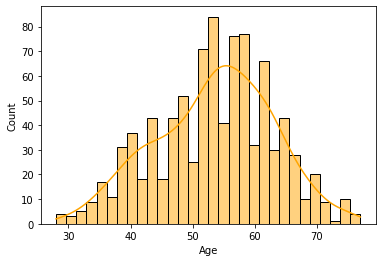

In [22]:
sns.histplot(dados, x="Age", bins=30, color="orange", kde=True, stat="count"); #linha media

Sexo

In [23]:
dados['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

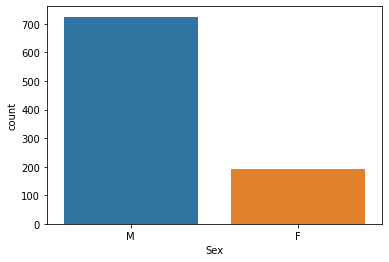

In [24]:
sns.countplot(data=dados, x="Sex"); 

Tipo de dor no peito

In [25]:
dados['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

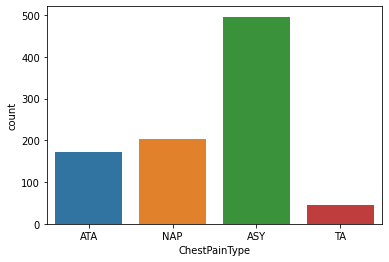

In [26]:
sns.countplot(x='ChestPainType',data=dados);

Pressão do sangue (maior)

In [27]:
dados.RestingBP.value_counts().sort_index() #maior pressão do sangue

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

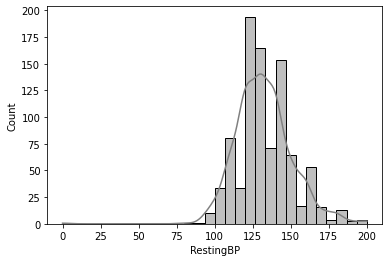

In [28]:
sns.histplot(dados, x='RestingBP', bins=30,color="gray", kde=True, stat="count")

Colesterol

In [29]:
dados.Cholesterol.value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

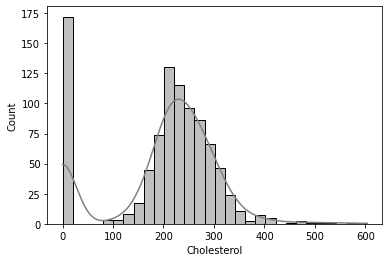

In [30]:
sns.histplot(dados, x='Cholesterol', bins=30,color="gray", kde=True, stat="count") #zero esta atrapalhando a distribuição

Açucar no sangue

In [31]:
dados.FastingBS.value_counts().sort_index()

0    704
1    214
Name: FastingBS, dtype: int64

0 -> não diabetico
1-> diabetico

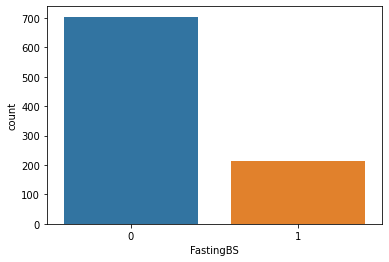

In [32]:
sns.countplot(x='FastingBS',data=dados);

Eletrocardiograma em repouso

In [33]:
dados.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

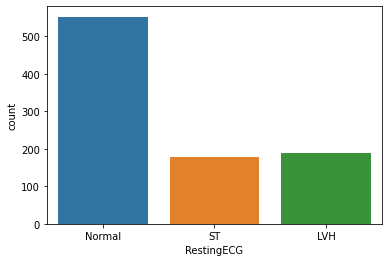

In [34]:
sns.countplot(x='RestingECG',data=dados);

Frequencia cardiaca maxima

In [35]:
dados.MaxHR.value_counts().sort_index()

60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: MaxHR, Length: 119, dtype: int64

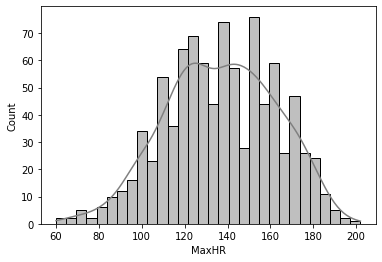

In [36]:
sns.histplot(dados, x='MaxHR', bins=30,color="gray", kde=True, stat="count");

Angina induzida por exercicios

In [37]:
dados.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [38]:
px.pie(dados,"ExerciseAngina")

Depressão de ST induzida por exercicio em relação ao repouso

In [39]:
dados.Oldpeak.value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

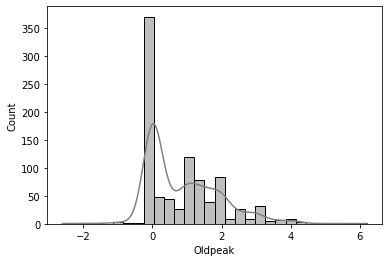

In [40]:
sns.histplot(dados, x='Oldpeak', bins=30,color="gray", kde=True, stat="count");

Doença Cardiaca

In [41]:
dados.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [42]:
px.pie(dados,'HeartDisease')


0 -> não <br>
1-> sim

In [43]:
px.pie(dados,'ST_Slope')

# Analise e Tratamento

In [ ]:
dados.dtypes #os tipo de variaveis

In [ ]:
dados.isnull().sum() #ver se tem dados em branco

quando tem valor faltante tem que fazer tratamento <br>
ou excluir dados ou preencher com os media/moda/mediana

In [ ]:
dados2 = dados.dropna() #excluir valores missing

In [ ]:
dados2.Age.fillna(dados2.Age.mean(), inplace=True) #substituir valor missing pela media

In [ ]:
dados2.Age.fillna(10, inplace=True) #substituir valores missin por valor 10

# Analises Estatisticas Descritivas

In [ ]:
dados.describe()

In [ ]:
dados.mode()

# Tratando valores incoerentes

Excluindo registro com pressão zero

In [4]:
dados2 = dados.loc[dados.RestingBP != 0] #copia dos dados excluindo o resgistro com 0

In [5]:
dados2.shape

(917, 12)

In [6]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Susbtituindo valores zero do colesterol pela media sem os zeros

In [7]:
dados2.Cholesterol.value_counts()

0      171
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [8]:
dados2.Cholesterol.mean() #media do colesterol com os 0

199.0163576881134

In [9]:
dados2.Cholesterol.replace(0, np.NaN, inplace=True) #colocando o valor medio do colesterol nos que estava 0

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [10]:
dados2.isnull().sum() #são 171 dados com 0 de colesterol

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [11]:
dados2.Cholesterol.mean() #media do colesterol substituindo o 0 pela media

244.6353887399464

In [12]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,746.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,59.153524,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,207.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,275.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
dados2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,254.0,0,Normal,150,N,0.0,Flat,1


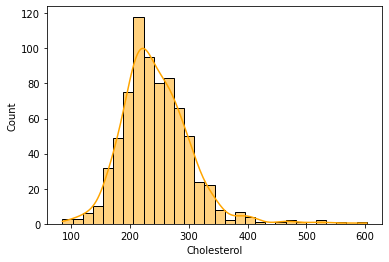

In [44]:
sns.histplot(dados2, x='Cholesterol', bins=30,color="orange", kde=True, stat="count");

# Analise de Outliers

In [45]:
#Idade
px.box(dados2, y='Age')

In [46]:
#Pressão sanguinea
px.box(dados2, y='RestingBP')

In [51]:
#Colesterol
px.box(dados2, y='Cholesterol')

In [49]:
#Frequencia Cardiaca maxima
px.box(dados2, y='MaxHR')

As vezes temos que manter alguns outliers

In [52]:
dados2.to_csv('heart_tratado.csv', sep=';', encoding='utf-8', index=False)